<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import lines
import seaborn as sns
from sklearn import preprocessing

from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# load file and read as clean1

file = 'sat_scores.csv'
with open(file, 'r') as f:
    raw_file = f.read()
clean1 = raw_file.splitlines()

In [3]:
# split row by ','

clean2 = []
[clean2.insert(index, row.split(',')) for index, row in enumerate(clean1)]
clean2[:5]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]

In [4]:
# convert 'Rate', 'Verbal' and 'Math' columns to float with try except

clean3 = []
for row in clean2:
    row_list = []
    for element in row:
        try:
            element = float(element)
        except:
            pass
        row_list.append(element)
    clean3.append(row_list)
clean3[:5]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', 82.0, 509.0, 510.0],
 ['NJ', 81.0, 499.0, 513.0],
 ['MA', 79.0, 511.0, 515.0],
 ['NY', 77.0, 495.0, 505.0]]

In [5]:
# create dictionary with keys as columns of dataframe, values as data under dataframe columns

sat_scores_dict = {}
for key in clean3[0]:
    sat_scores_dict[key] = []

for row in clean3[1:]:
    for index, element in enumerate(row):
        sat_scores_dict[list(sat_scores_dict.keys())[index]].append(element)
pprint(sat_scores_dict)

{'Math': [510.0,
          513.0,
          515.0,
          505.0,
          516.0,
          499.0,
          499.0,
          506.0,
          500.0,
          501.0,
          499.0,
          510.0,
          499.0,
          489.0,
          501.0,
          488.0,
          474.0,
          526.0,
          499.0,
          527.0,
          499.0,
          515.0,
          510.0,
          517.0,
          525.0,
          515.0,
          542.0,
          439.0,
          539.0,
          512.0,
          542.0,
          553.0,
          542.0,
          589.0,
          550.0,
          545.0,
          572.0,
          589.0,
          580.0,
          554.0,
          568.0,
          561.0,
          577.0,
          562.0,
          596.0,
          550.0,
          570.0,
          603.0,
          582.0,
          599.0,
          551.0,
          514.0],
 'Rate': [82.0,
          81.0,
          79.0,
          77.0,
          72.0,
          71.0,
          71.0,
   

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [6]:
# read csv using pd.df.from_dict

df_from_dict = pd.DataFrame.from_dict(sat_scores_dict)
df_from_dict.dtypes

State      object
Rate      float64
Verbal    float64
Math      float64
dtype: object

In [7]:
# read csv using pd.read_csv

df_from_csv = pd.read_csv('./sat_scores.csv')
df_from_csv.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
# from here onwards will be using dataframe from .read_csv (i.e. sat_scores)

sat_scores = df_from_csv

In [9]:
len(sat_scores)

# But USA only has 50 states

52

In [10]:
# Assuming we are only interested in the 50 (actual) USA states
# Hence to remove the two rows ('ALL' and 'DC') 

sat_scores_backup = sat_scores.copy() # make a backup copy

sat_scores = sat_scores[(sat_scores.State != 'All')] 
sat_scores = sat_scores[(sat_scores.State != 'DC')] 
sat_scores.reset_index(drop= True).head() # reset index to run continuously from 0 to 49

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [11]:
sat_scores.head(10).describe()

# only describe the numerical rows

,Rate,Verbal,Math
count,10.000000,10.000000,10.000000
mean,73.900000,506.200000,506.400000
std,5.321863,7.465476,6.703233
min,68.000000,495.000000,499.000000
25%,69.500000,500.250000,500.250000
50%,71.500000,507.500000,505.500000
75%,78.500000,510.750000,512.250000
max,82.000000,520.000000,516.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
data_dict = {
    'State: States of USA, string',
    'Rate: Rate of Participation, integer',
    'Verbal: Average Score for Language Section, integer',
    'Math: Average Score for Math Section, integer',         
    'Shape: 52 rows and 4 columns'
}

In [13]:
pprint(data_dict)

{'Math: Average Score for Math Section, integer',
 'Rate: Rate of Participation, integer',
 'Shape: 52 rows and 4 columns',
 'State: States of USA, string',
 'Verbal: Average Score for Language Section, integer'}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

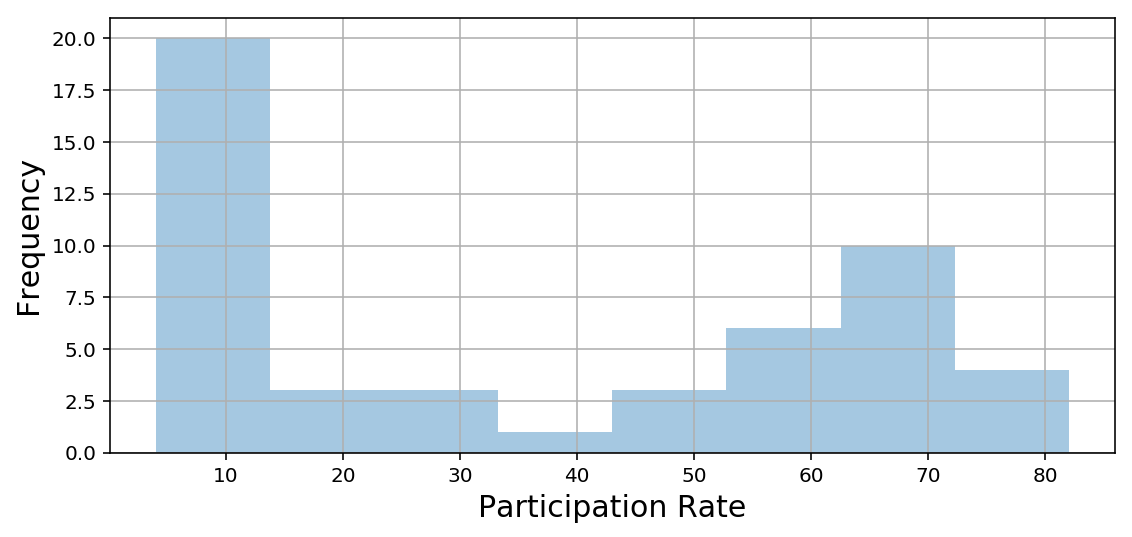

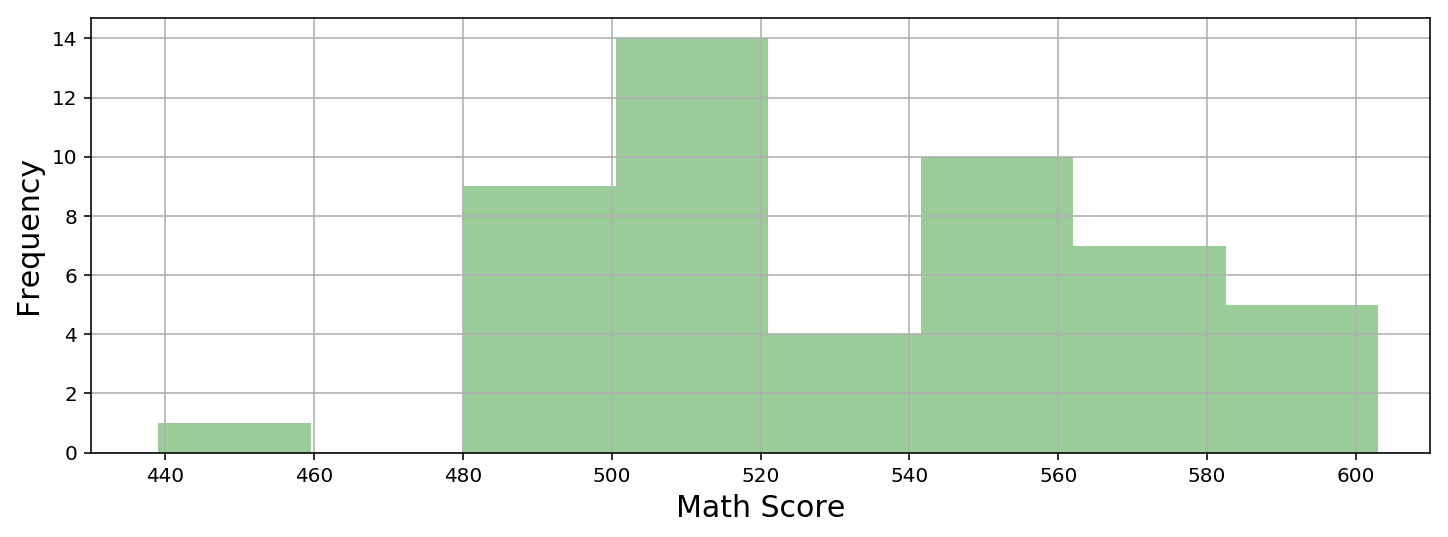

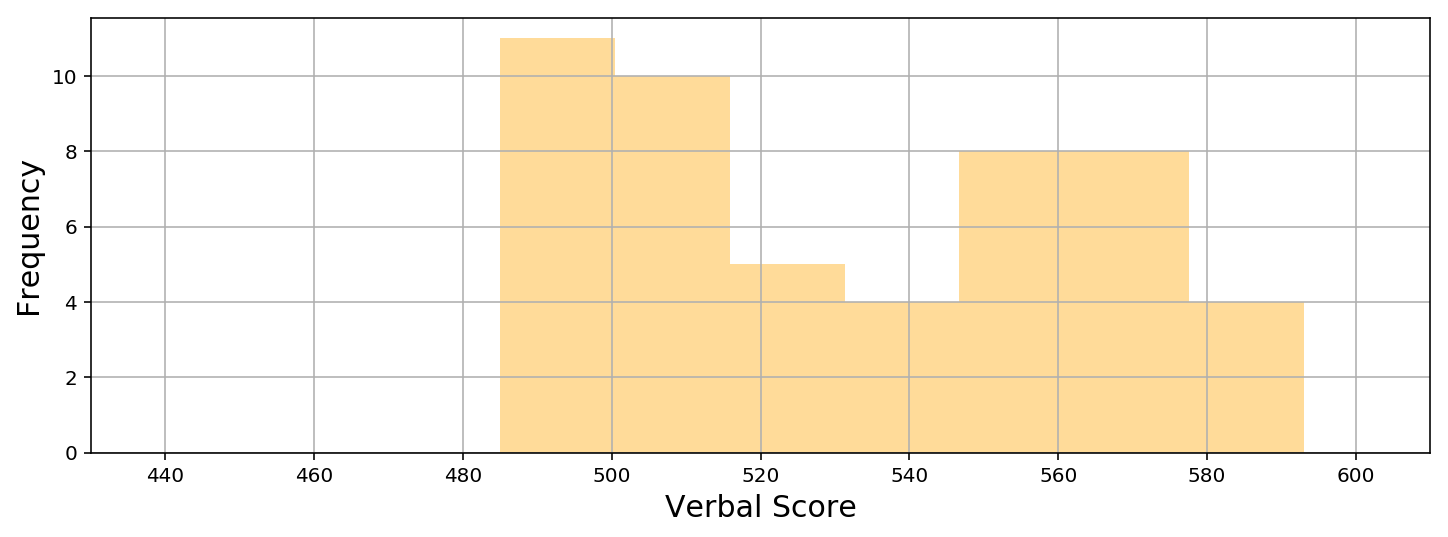

In [14]:
plt.figure(figsize=(9,4))
sns.distplot(sat_scores.Rate, kde = False, bins = 8)
plt.xlabel('Participation Rate', fontsize=15)
plt.ylabel('Frequency', fontsize = 15)
plt.grid()

plt.figure(figsize=(12,4))
sns.distplot(sat_scores['Math'], kde= False, bins= 8, color= 'green')
plt.xlim(430, 610) #to align x-axis range with Math plot
plt.xlabel('Math Score', fontsize=15)
plt.ylabel('Frequency', fontsize = 15)
plt.grid()

plt.figure(figsize=(12,4))
sns.distplot(sat_scores['Verbal'], kde= False, bins= 7, color= 'orange')
plt.xlim(430, 610)
plt.xlabel('Verbal Score', fontsize=15)
plt.ylabel('Frequency', fontsize = 15)
plt.grid()

plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [15]:
sat_scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


<Figure size 432x288 with 0 Axes>

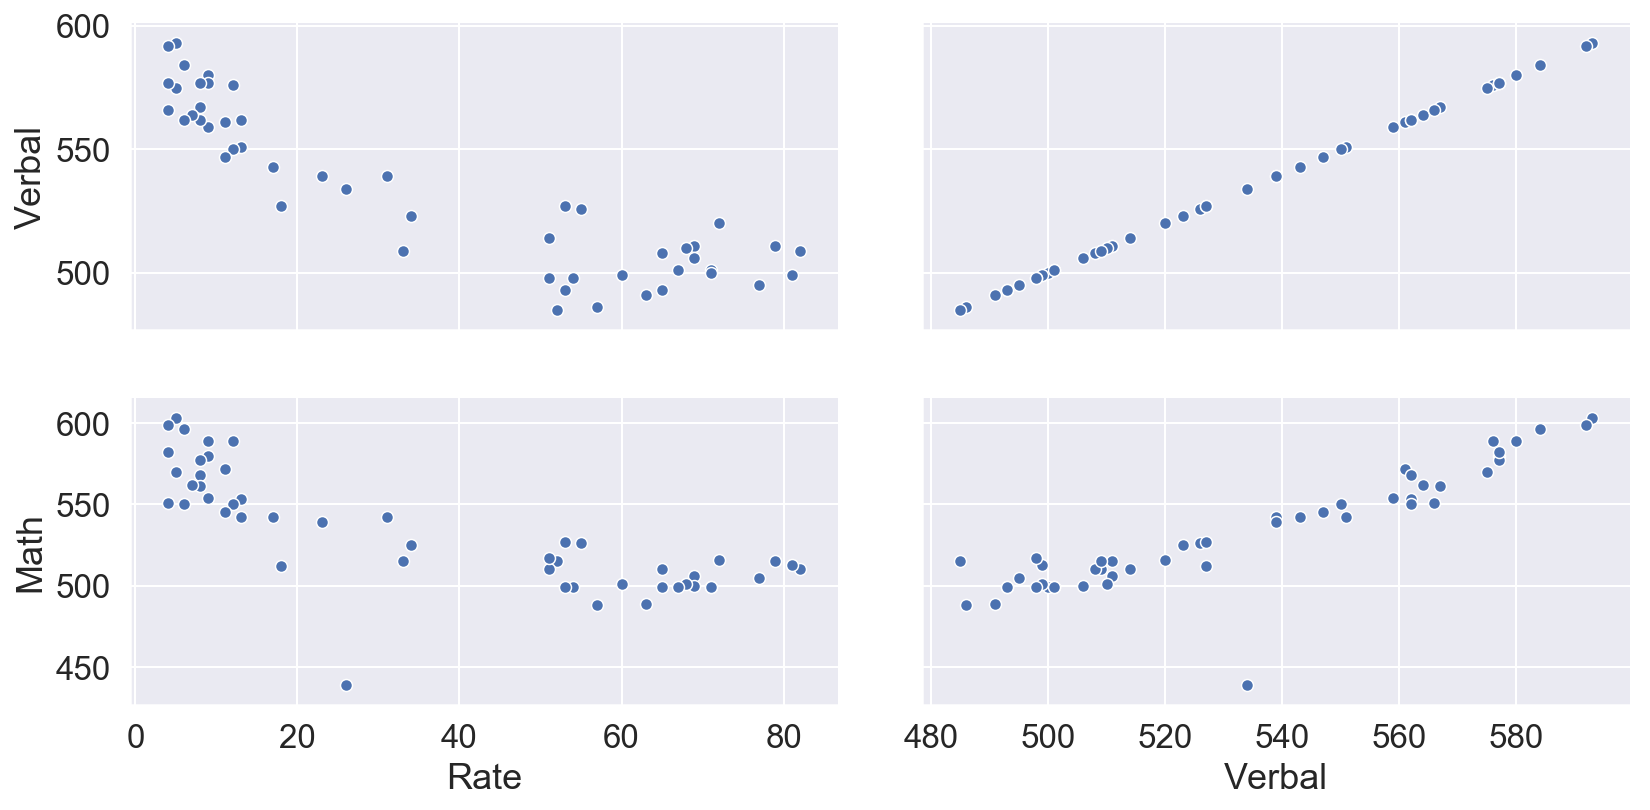

In [16]:
plt.figure()

sns.set(font_scale=1.5)
sns.pairplot(sat_scores, x_vars=['Rate', "Verbal"], y_vars=["Verbal", "Math"], height = 3, aspect =2)

plt.show()

# In general, the average score for Verbal and Math decreases for states with higher Participation Rate.
# In general, States with higher average Verbal score has higher Math score too.
# There may be an obvious outlier state with excessive low Math score (~445)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

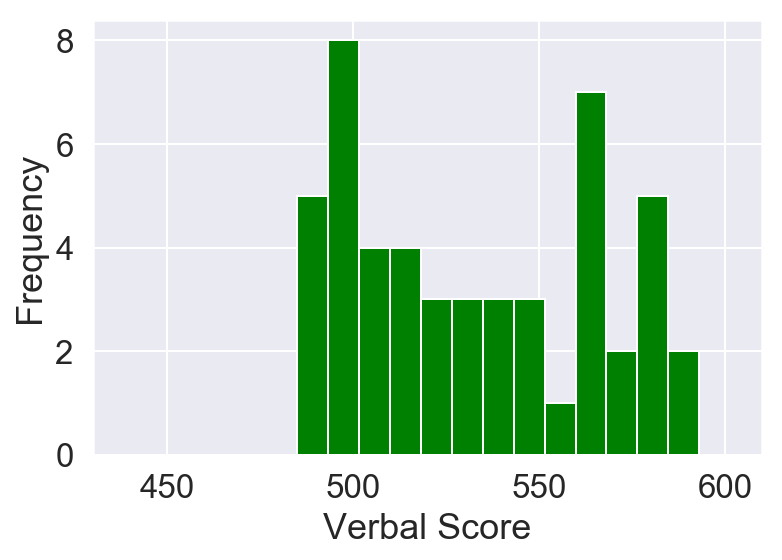

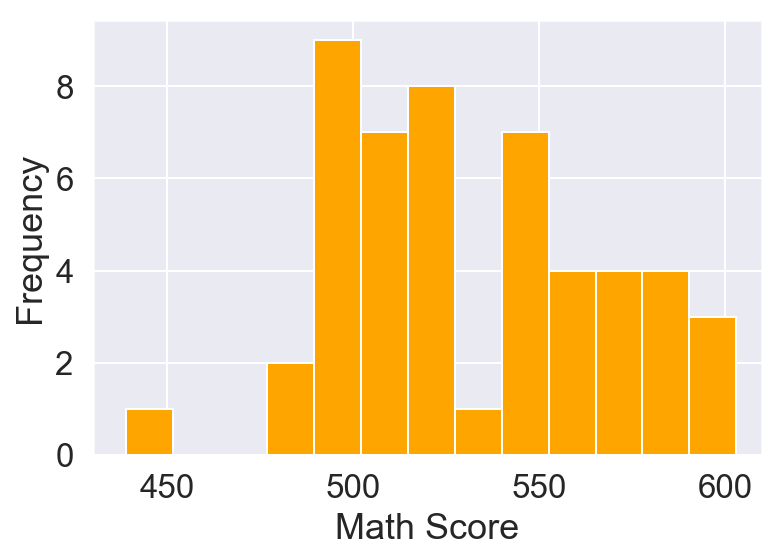

In [17]:
sat_scores.hist(column= 'Verbal', bins= 13, color = 'green')
plt.xlim(430, 610)
plt.xlabel('Verbal Score', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('')

sat_scores.hist(column= 'Math', bins= 13, color = 'orange')
plt.xlim(430, 610)   #to align x-axis range with Verbal plot
plt.xlabel('Math Score', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('')

plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

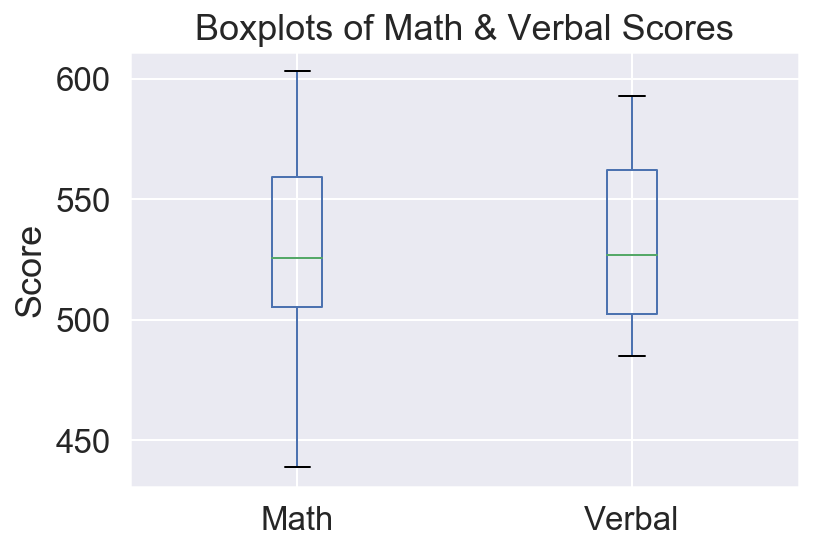

In [18]:
sat_scores.boxplot(column=['Math', 'Verbal'])

plt.title('Boxplots of Math & Verbal Scores')
plt.ylabel('Score')

plt.show()

# Boxplot shows outliers that are 1.5 times inter-quartile range lesser than lower quartile or greater than upper quartile

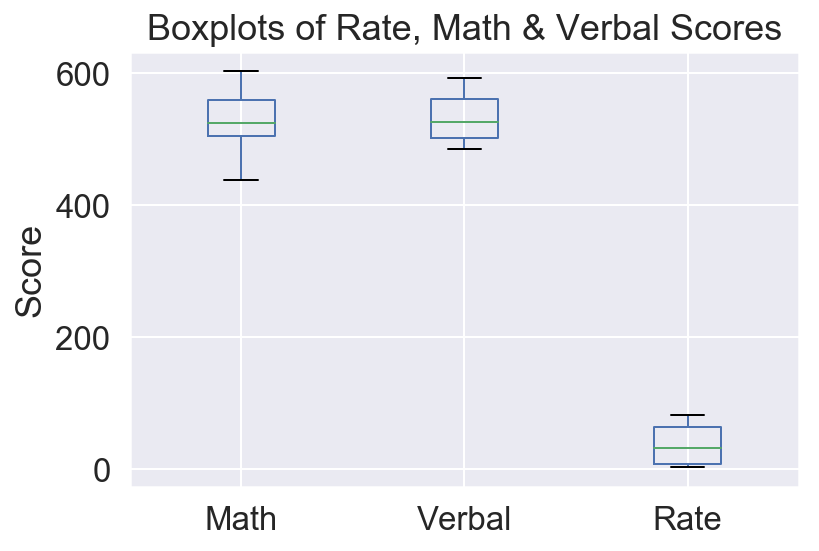

In [19]:
sat_scores.boxplot(column=['Math', 'Verbal', 'Rate'] )

plt.title('Boxplots of Rate, Math & Verbal Scores')
plt.ylabel('Score')

plt.show()

# As the y-axis range for Rate is much lower than Math and Verbal, it skewed the y-axis showing very narrow boxplots.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [20]:
# Standardise the 3 variables to compare them on a same scale, based on how far they are from the mean 
#   in terms of standard deviations.

In [21]:
# Columns to standardise
sat_scores_std = sat_scores[['Math', 'Verbal', 'Rate']]

# Create the Scaler object
scaler = preprocessing.StandardScaler()

scaled_array = scaler.fit_transform(sat_scores_std)
scaled_df = pd.DataFrame(scaled_array, columns= ['Math', 'Verbal', 'Rate'])

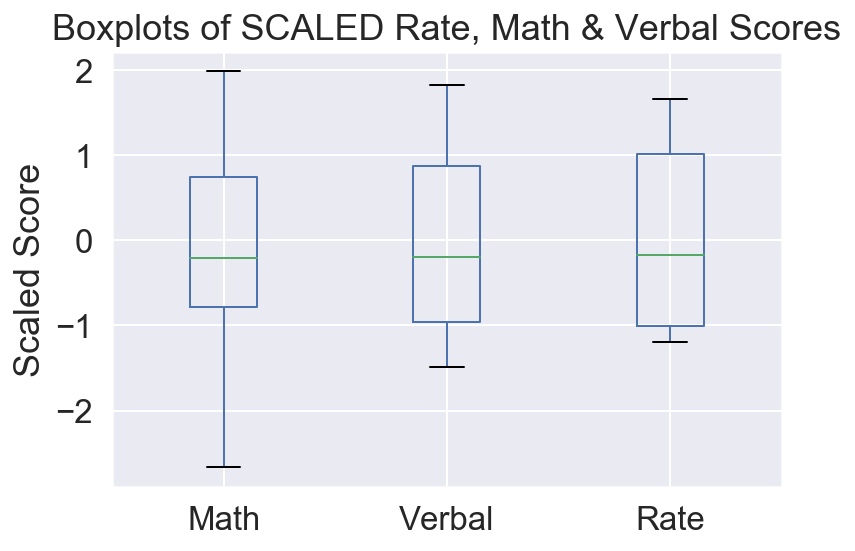

In [22]:
scaled_df.boxplot(column=['Math', 'Verbal', 'Rate'] )

plt.title('Boxplots of SCALED Rate, Math & Verbal Scores')
plt.ylabel('Scaled Score')

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [23]:
verbal_mean = sat_scores['Verbal'].mean()

In [24]:
# States with Verbal score higher than average
verbal_above_mean = sat_scores[sat_scores['Verbal'] > verbal_mean]['State']
verbal_above_mean

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [25]:
# Total 24 states with Verbal score above average
verbal_above_mean.count()

24

In [26]:
# Total number of states
sat_scores['State'].count()

50

In [27]:
# Out of the 52 states, 46% of the states have score higher than average.
# This tells me the number of states with lower and higher than average Verbal score are similar.
verbal_above_mean.count()/ sat_scores['State'].count() *100 

48.0

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [28]:
verbal_median = sat_scores['Verbal'].median()
verbal_median

527.0

In [29]:
# States with Verbal score higher than median
verbal_above_median = sat_scores[sat_scores['Verbal'] > verbal_median]['State']
verbal_above_median

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [30]:
# Total 26 states with Verbal score above average
verbal_above_median.count()

24

In [31]:
# These are the common states with Verbal score above mean and above median 
verbal_common = list(set(verbal_above_mean).intersection(verbal_above_median))
verbal_common

['MT',
 'ID',
 'TN',
 'OK',
 'NE',
 'LA',
 'WY',
 'MS',
 'MN',
 'NM',
 'CO',
 'KY',
 'AL',
 'IL',
 'ND',
 'SD',
 'MI',
 'IA',
 'MO',
 'AR',
 'UT',
 'WI',
 'KS',
 'OH']

In [32]:
# There are 24 common states with Verbal score above mean and above median
len(verbal_common)

24

In [33]:
# To check if all 24 states with Verbal score above mean are also states with Verbal score above median

result = []
for state in verbal_common:
    if state not in list(verbal_above_mean):
        result.append(state)
        
if result == []:
    print('All 24 states with Verbal score above mean are also states with Verbal score above median')
else:
    print(f"This state is not in the list: {result}")

All 24 states with Verbal score above mean are also states with Verbal score above median


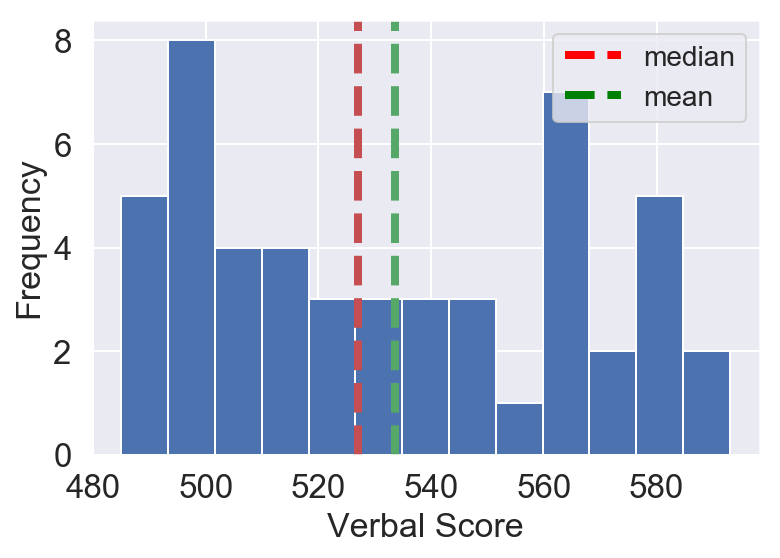

In [34]:
# In regards to why all 24 states with Verbal score above mean are also states with Verbal score above median
# As show in chart below, the mean and median lines are pretty close as the numbers of state with higher or lower than
#   average mean are pretty similar and the degree of change is also pretty similar.

plt.hist(sat_scores['Verbal'], bins= 13)
plt.xlabel('Verbal Score', fontsize = 17)
plt.ylabel('Frequency', fontsize = 17)

plt.axvline(x=sat_scores['Verbal'].median(), color = 'r', linestyle = '--', linewidth = 4)
plt.axvline(x=sat_scores['Verbal'].mean(), color = 'g', linestyle = '--', linewidth = 4)

lgd = []
lgd.append(lines.Line2D([0,0],[0,1], color = 'red', label = 'median', linestyle= '--', linewidth = 4))
lgd.append(lines.Line2D([0,0],[0,1], color = 'green', label = 'mean', linestyle= '--', linewidth = 4))

plt.legend(handles = lgd, prop={'size': 14})

plt.show()

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [35]:
sat_scores['Verbal-Math'] = sat_scores['Verbal'] - sat_scores['Math']
sat_scores.head()

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [36]:
sat_scores_verbal_math = sat_scores.loc[:, ['State','Verbal-Math']].copy().reset_index(drop= True).sort_values(\
    'Verbal-Math', ascending= False).head(10)
sat_scores_verbal_math.head(3)

,State,Verbal-Math
26,OH,95
49,MS,15
28,WV,15


In [37]:
sat_scores_math_verbal = sat_scores.copy()

In [38]:
sat_scores_math_verbal['Math-Verbal'] = sat_scores_math_verbal['Math'] - sat_scores_math_verbal['Verbal']

In [39]:
sat_scores_math_verbal = sat_scores_math_verbal.loc[:, ['State','Math-Verbal']].sort_values(\
    'Math-Verbal', ascending= False).head(10)
sat_scores_math_verbal.head(3)

,State,Math-Verbal
21,HI,30
23,CA,19
1,NJ,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [40]:
sat_scores.corr()

,Rate,Verbal,Math,Verbal-Math
Rate,1.000000,-0.892175,-0.775017,-0.105912
Verbal,-0.892175,1.000000,0.894788,0.060352
Math,-0.775017,0.894788,1.000000,-0.391676
Verbal-Math,-0.105912,0.060352,-0.391676,1.000000


In [41]:
# High correlation (close to +1 or -1) represents a highly linear relationship between the two variables
# Verbal is highly inversely correlated with Rate and highly postively correlated with Math
# Relatively, Math is somewhat inversely correlated with Rate as compared to Verbal with Rate

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [42]:
sat_scores.describe()

,Rate,Verbal,Math,Verbal-Math
count,50.000000,50.000000,50.000000,50.000000
mean,36.620000,533.540000,533.000000,0.540000
std,27.695052,32.901343,35.693137,15.965793
min,4.000000,485.000000,439.000000,-30.000000
25%,9.000000,502.250000,505.250000,-6.000000
50%,32.000000,527.000000,525.500000,0.000000
75%,64.500000,562.000000,559.250000,4.000000
max,82.000000,593.000000,603.000000,95.000000


In [43]:
# count: number of non-NaN values
# mean: mean of column
# std: standard deviation of column
# min: minimum value of column
# 25%: 25th percentile value
# 50%: 50th percentile value
# 75%: 75th percentile value
# min: minimum value of column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [44]:
sat_scores.cov()

,Rate,Verbal,Math,Verbal-Math
Rate,767.015918,-812.953878,-766.122449,-46.831429
Verbal,-812.953878,1082.498367,1050.795918,31.702449
Math,-766.122449,1050.795918,1274.000000,-223.204082
Verbal-Math,-46.831429,31.702449,-223.204082,254.906531


In [45]:
# 1) Covariance is a measure of correlation
# 2) Corr(X,Y) = Cov(X,Y) / (σXσY)
# 3a) Correlation is more useful for determining how strong the relationship is between the two variables. 
# 3b) Covariance can take on practically any number while a correlation is limited: -1 to +1.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [46]:
drug = pd.read_csv('./drug-use-by-age.csv')

In [47]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [48]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [49]:
# Yes requires cleaning
# rename column "n" to some more intuitive, shorten "frequency" to "freq"
# change all values with '-' to 'NaN', and then convert these columns data type to float
# create another column (type = int) to categorise the groups 

# Yes has values with '-'
# Number of '-' not many
# Either replace '-' with a number based on best estimate (e.g. use average or median), or replace with 'NaN'

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [50]:
def replace_missing (x):
    """
    This function replace '-' with ''
    """
    return x.replace('-', '')

In [51]:
# replace all '-' with ''

drug = drug.apply(replace_missing)

In [52]:
# convert all columns from 'alcohol-use' onwards to float

for i in drug.iloc[:,2:]:
    drug.loc[:,i] = pd.to_numeric(drug.loc[:,i])

In [53]:
# create new column cocaine_crack by summing cocaine and crack as highly likely they refer to the same thing

drug['cocaine_crack-use'] = drug['cocaine-use'] + drug['crack-use']
drug['cocaine_crack-frequency'] = drug['cocaine-frequency'] + drug['crack-frequency']

In [54]:
drug.drop(columns= ['cocaine-use', 'crack-use', 'cocaine-frequency', 'crack-frequency'], inplace= True)

In [55]:
# create new column as int to define age group
# group 1: less than 15, group 2: 15 to 17, group 3: 18 to 21, etc.

drug['age_group'] = [1,1,1,2,2,2,3,3,3,3,4,5,6,7,8,9,10]

In [56]:
drug[['age_group', 'age']]

,age_group,age
0,1,12
1,1,13
2,1,14
3,2,15
4,2,16
5,2,17
6,3,18
7,3,19
8,3,20
9,3,21


In [57]:
# filter the list of columns to have just columns with string 'use' and 'age_group'

drug_col = [col for col in list(drug.columns) if 'use' in col or 'age' in col]

In [58]:
# assign a new variable to the subset of drug dataframe

drug_age_use = drug[drug_col]
drug_age_use.head()

,age,alcohol-use,marijuana-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,cocaine_crack-use,age_group
0,12,3.9,1.1,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2,0.1,1
1,13,8.5,3.4,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1,0.1,1
2,14,18.1,8.7,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2,0.1,1
3,15,29.2,14.5,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4,0.6,2
4,16,40.1,22.5,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2,1.0,2


<Figure size 432x288 with 0 Axes>

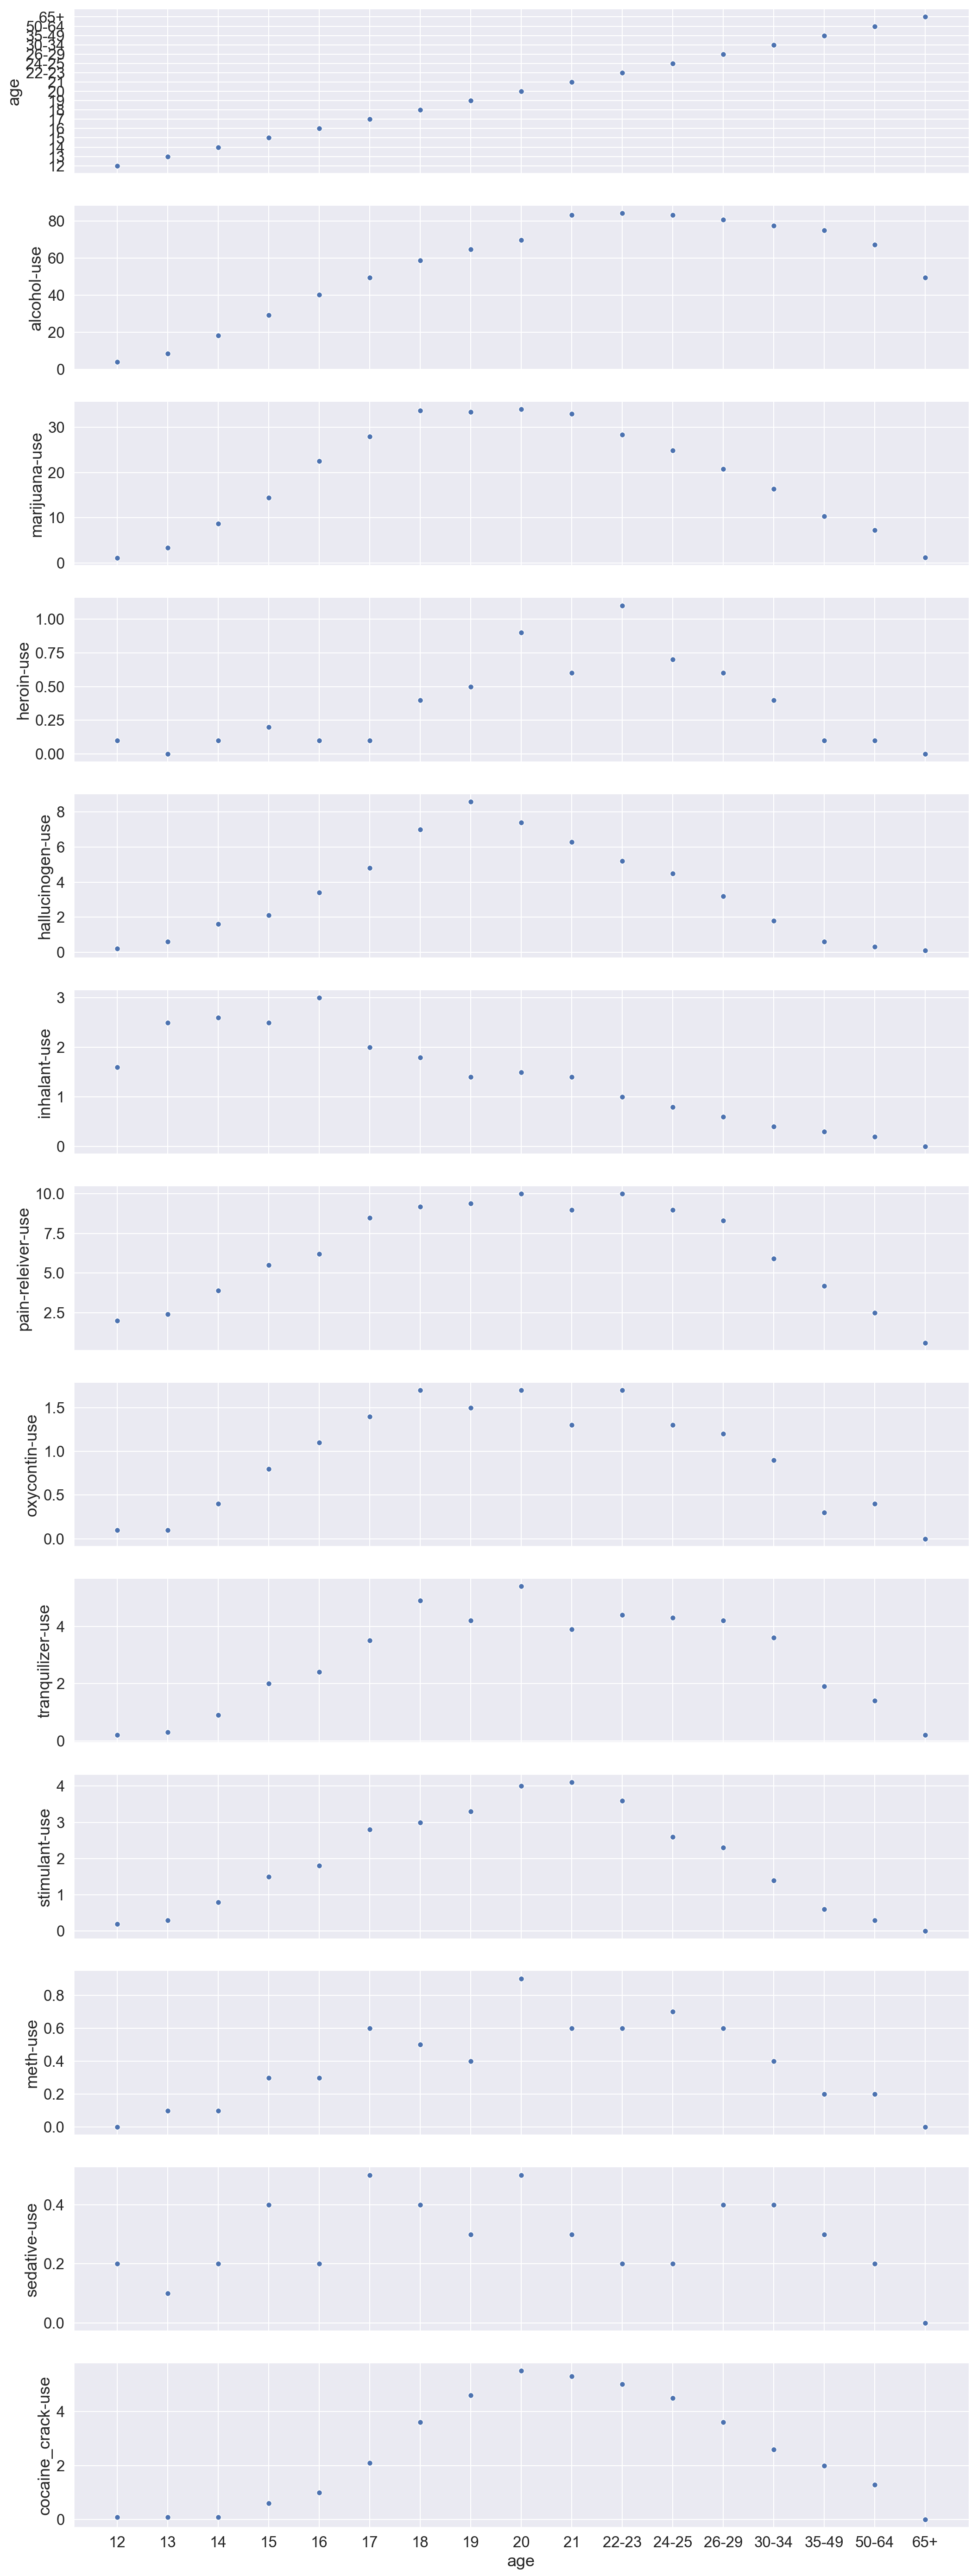

In [59]:
# Pair plot all drugs use % against age group

plt.figure()

sns.set(font_scale=1.5)

# exclude 'age_group'
sns.pairplot(drug_age_use, height = 3, aspect = 5, x_vars=['age'], y_vars=list(drug_age_use.columns)[:-1]) 

plt.show()

# Observed an increasing, then decreasing trends for most charts 
# Observed peaks usually at the age of 20 or 21

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [60]:
# Hypothesis: Across each age group, people consumed transquilizer more than cocaine_crack (cocaine+crack), alpha = 0.05

In [61]:
drug_age_use.describe()

# tranquilizer has higher mean than cocaine_crack

,alcohol-use,marijuana-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,cocaine_crack-use,age_group
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353,2.470588,4.117647
std,26.878866,11.959752,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000,2.017971,2.891417
min,3.900000,1.100000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,40.100000,8.700000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000,0.600000,2.000000
50%,64.600000,20.800000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000,2.100000,3.000000
75%,77.500000,28.400000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000,4.500000,6.000000
max,84.200000,34.000000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000,5.500000,10.000000


In [62]:
stats.ttest_ind(drug_age_use['tranquilizer-use'], drug_age_use['cocaine_crack-use'])

# p-value is more than alpha of 0.05, cannot reject null hypothesis, no statistical difference, 
#   cannot conclude people consumed transquilizer more than cocaine_crack

Ttest_indResult(statistic=0.5171331226381489, pvalue=0.6086194946501999)

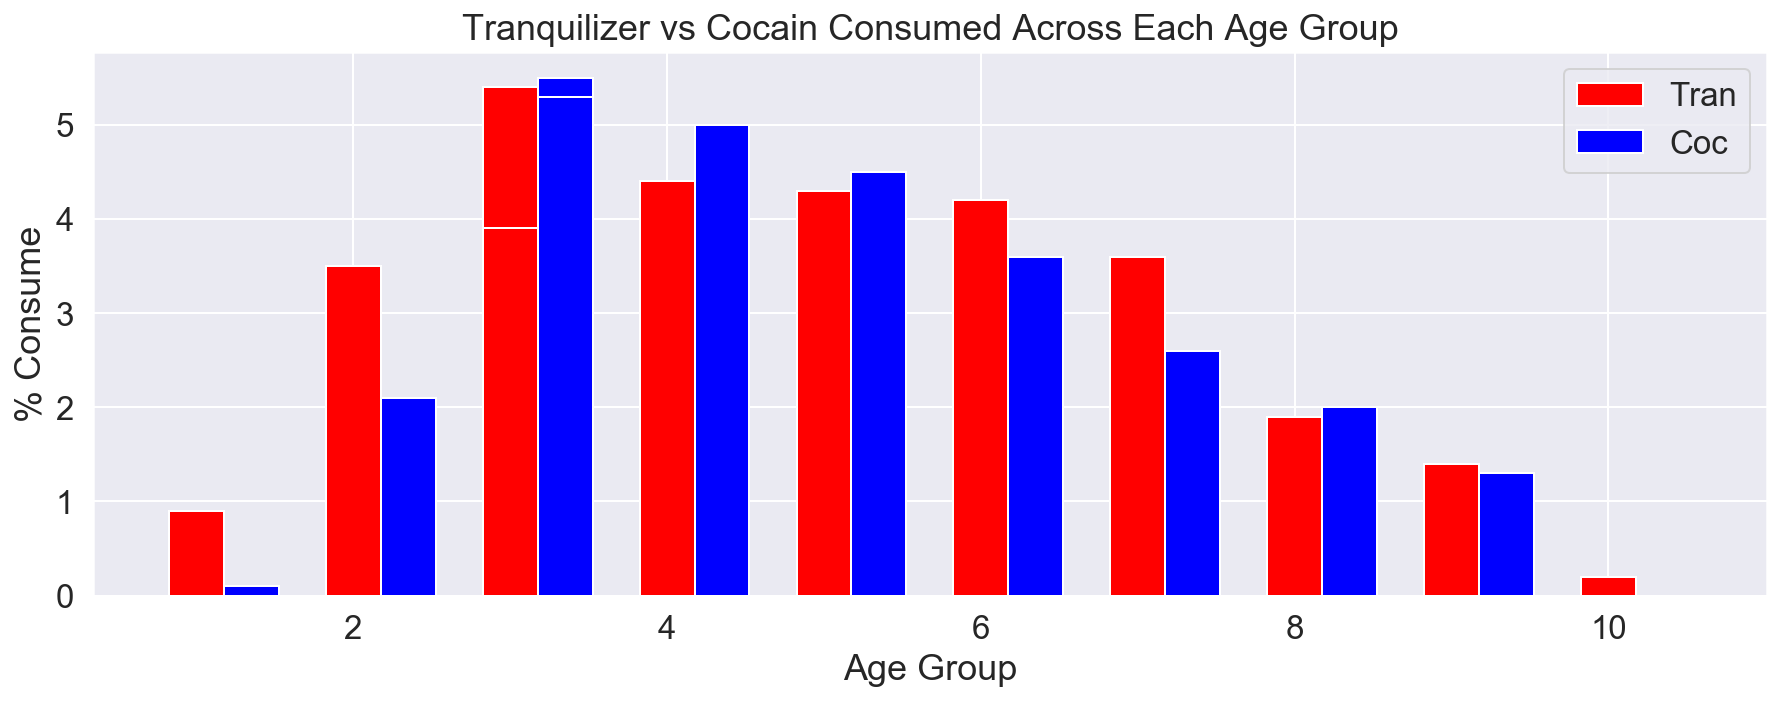

In [63]:
plt.figure(figsize=(15,5))
width = 0.35
plt.bar(x= drug_age_use['age_group'], height= drug_age_use['tranquilizer-use'], width = 0.35, color='red')
plt.bar(x= drug_age_use['age_group'] + width, height= drug_age_use['cocaine_crack-use'], width = 0.35, color='blue')

plt.title('Tranquilizer vs Cocain Consumed Across Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('% Consume')
plt.legend(['Tran', 'Coc'])

plt.show()

**Report**


Hypothesis: Across each age group, people consumed transquilizer more than cocaine_crack (cocaine+crack), alpha = 0.05


p-value is more than alpha of 0.05, cannot reject null hypothesis, no statistical difference.


Hence, cannot conclude people consumed transquilizer more than cocaine_crack
...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [64]:
rate_original = sat_scores[['Rate']]

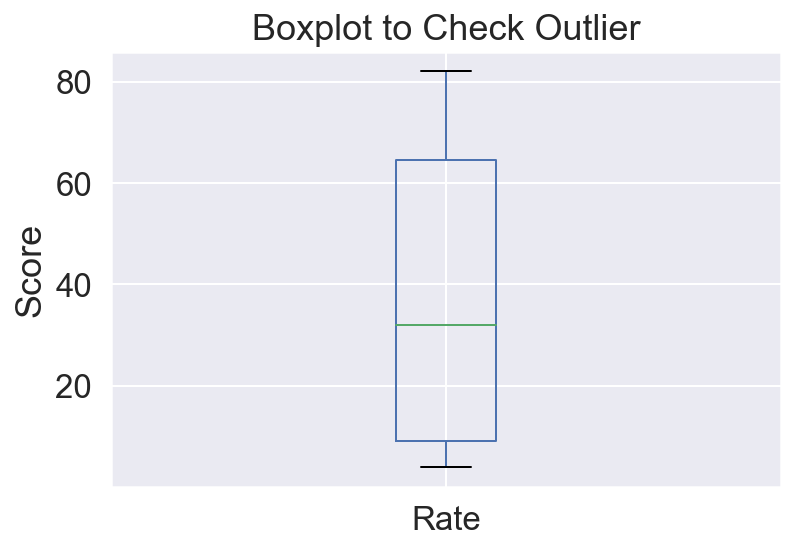

In [65]:
rate_original.boxplot(column= 'Rate')

plt.title('Boxplot to Check Outlier')
plt.ylabel('Score')

plt.show()

# No outlier based on 1.5 times of IQR

In [66]:
# 3 Outliers based on 1.5 standard deviation from mean

rate_original[(np.abs(stats.zscore(rate_original)) > 1.5)]

,Rate
0,82
1,81
2,79


In [67]:
rate_filtered = rate_original.iloc[3:,:]

# sat_scores = sat_scores[(sat_scores.State != 'All')] 

In [68]:
print(f"original mean: {rate_original['Rate'].mean()} vs new mean: {rate_filtered['Rate'].mean()}" + '\n' +
     f"original median: {rate_original['Rate'].median()} vs new median: {rate_filtered['Rate'].median()}" + '\n' +
     f"original sd: {rate_original['Rate'].std()} vs new sd: {rate_filtered['Rate'].std()}")

original mean: 36.62 vs new mean: 33.808510638297875
original median: 32.0 vs new median: 26.0
original sd: 27.695052236227088 vs new sd: 26.1214873218868


In [69]:
f"original sd: {rate_original['Rate'].std()} vs new sd: {rate_filtered['Rate'].std()}"

'original sd: 27.695052236227088 vs new sd: 26.1214873218868'

In [70]:
# 3 most extreme high values (above mean) have been removed, hence the mean, median and sd will decrease. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [71]:
# 1) The Spearman correlation coefficient evaluates the monotonic relationship between 2 variables based on the 
#    ranked values and the Pearson correlation evaluates the linear relationship between two continuous variables 
#    of actual values. 

In [72]:
# 2) 
# step 1: create 2 new columns to rank Verbal and Math, where rank 1 is highest followed by rank 2 and so on
# step 2: create another column to calculate the difference between these 2 columns from step 1
# step 3: create another column to square column from step 2
# step 4: Σd = sum of this column 
# step 5: spearman rank correlation = Rs = 1 – [(6 * Σd) / (n**3 – n)], where n = number of pairwise cases.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [73]:
# create a new subset copy with just Rate column

sat_scores_rate_percentile = sat_scores[['State', 'Rate']].copy()

In [74]:
# added a new column of Rate Percentile

sat_scores_rate_percentile['Rate_Percentile'] = [stats.percentileofscore(sat_scores_rate_percentile['Rate'].values, i) 
                                                 for i in sat_scores_rate_percentile['Rate'].values]

In [75]:
sat_scores_rate_percentile[sat_scores_rate_percentile['State'] == 'CA']

,State,Rate,Rate_Percentile
23,CA,51,57.0


In [76]:
# Spearman rank correlation ranked the variables based on their percentile

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [77]:
# Able to identify the top few min and max values based on their percentiles

In [78]:
# make a copy

drug_percentile = drug.copy()

In [79]:
# added a new column of Alcohol Percentile

drug_percentile['Alcohol_Percentile'] = [stats.percentileofscore(drug_percentile['alcohol-frequency'].values, i) 
                                                 for i in drug_percentile['alcohol-frequency'].values]

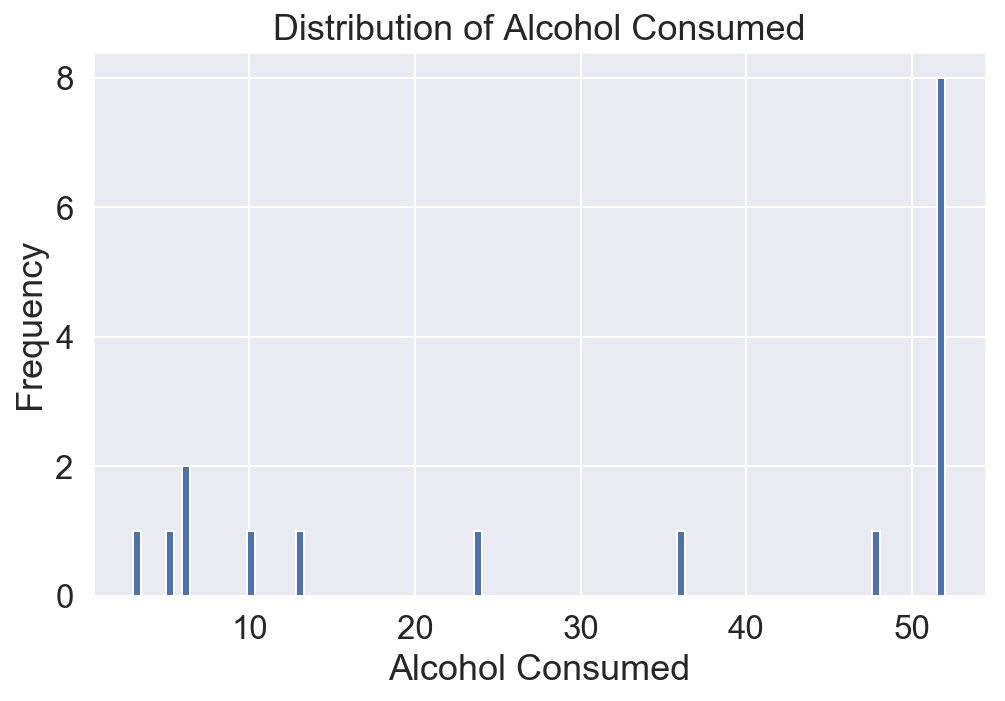

In [80]:
plt.figure(figsize=(8,5))
plt.hist(drug_percentile['alcohol-frequency'],bins=100)

plt.title('Distribution of Alcohol Consumed')
plt.xlabel('Alcohol Consumed')
plt.ylabel('Frequency')

plt.show()

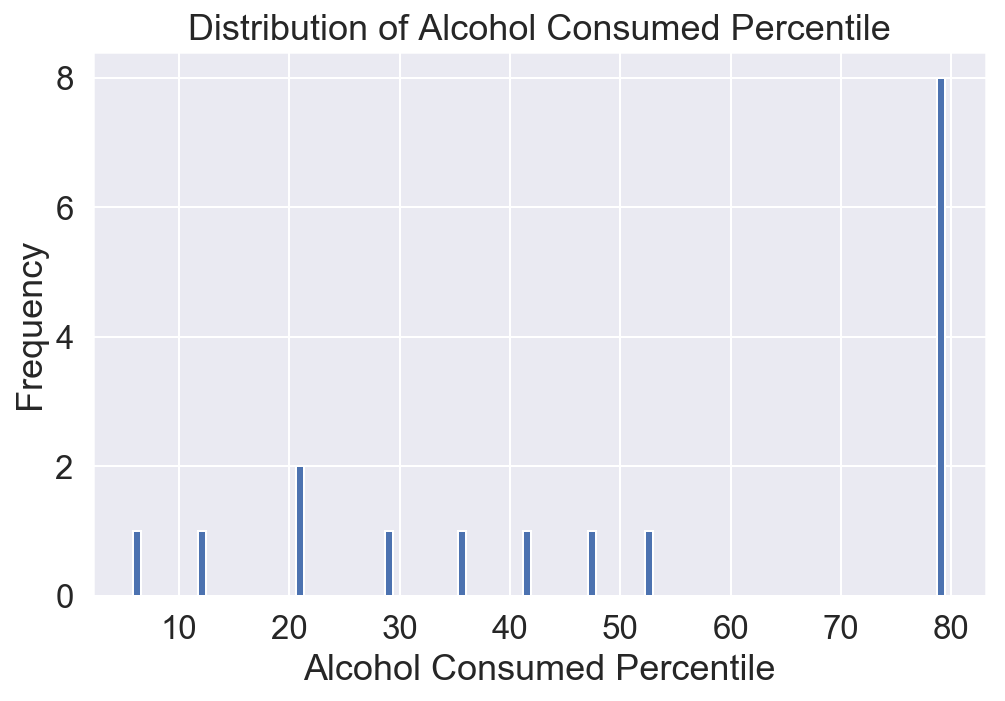

In [81]:
plt.figure(figsize=(8,5))
plt.hist(drug_percentile['Alcohol_Percentile'],bins=100)

plt.title('Distribution of Alcohol Consumed Percentile')
plt.xlabel('Alcohol Consumed Percentile')
plt.ylabel('Frequency')

plt.show()

In [82]:
# Percentile chart able to identify the number of high and low values. However, not able to tell the extent of difference